In [1]:
#Importing all the stuff we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce
from scipy.stats import chi2_contingency
pd.options.mode.chained_assignment = None  # default='warn'

## Coverage analysis for scaffolds from paper

fem, male54,male55,male59

In [2]:
fem = pd.read_table('FemaleSoap.txt', delimiter = ' ')
male54 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/MaleSoap54.txt', delimiter = ' ')
male55 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/MaleSoap55.txt', delimiter = ' ')
male59 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/MaleSoap59.txt', delimiter = ' ')

In [3]:
#merging all data according to the scaffold id
data_frames_paper = [fem,male54,male55,male59]
cov1 = reduce(lambda  left,right: pd.merge(left,right,on=['Scaffold'],
                                            how='outer'), data_frames_paper)

In [4]:
## select scaffolds which length is equal or greater than 1000bp
mergecov1 =cov1.loc[(cov1['Length'] >= 1000)]
mergecov1['maleTotal'] = mergecov1['Mcov54']+mergecov1['Mcov55']+mergecov1['Mcov59']
mergecov1['m+1'] = mergecov1['maleTotal']+1
mergecov1['f+1'] = mergecov1['Fcov']+1
mergecov1['ratio'] = np.log2(mergecov1['m+1']/mergecov1['f+1'])
## Criteria to assign X/A
mergecov1['chromosome'] = np.where((mergecov1['ratio'] <(mergecov1.ratio.median()-0.5)),'X','A')

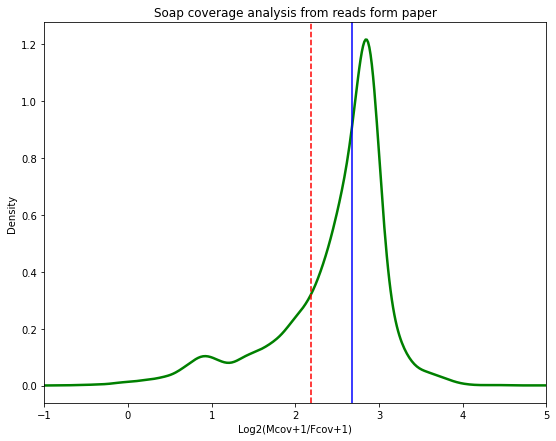

In [5]:
## density plot 
plt.figure(figsize=(9,7))
mergecov1.ratio.plot.density(color='green', linewidth=2.5)
plt.title('Soap coverage analysis from reads form paper')
plt.xlim([-1, 5])
plt.axvline(mergecov1.ratio.median(),color='blue')
plt.axvline(mergecov1.ratio.median() - 0.5,color='red', linestyle='dashed')
plt.xlabel('Log2(Mcov+1/Fcov+1)')
plt.show()

## Coverage analysis with other reads (cucarachas)
femc, fem66,fem67,fem68,male63,mal64

In [6]:
fem65 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap65.txt', delimiter = ' ')
male63 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/MaleSoap63.txt', delimiter = ' ')
male64 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/MaleSoap64.txt', delimiter = ' ')
fem66 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap66.txt', delimiter = ' ')
fem67 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap67.txt', delimiter = ' ')
fem68 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap68.txt', delimiter = ' ')

In [8]:
## merging all coverages according to scaffolds
data_frames = [fem65,fem66,fem67,fem68, male63, male64]
sq = reduce(lambda  left,right: pd.merge(left,right,on=['Scaffold'],
                                            how='outer'), data_frames)
cov2 = sq[['Scaffold','Length','Fcov65','Fcov66','Fcov67','Fcov68','Mcov63','Mcov64']]


In [9]:
#Picking data whose length is equal or greater than 1000bp
mergecov2 =cov2.loc[(cov2['Length'] >= 1000)]

In [10]:
#Replacing the NaN with zero.
mergecov2['Fcov66'] = mergecov2['Fcov66'].fillna(0)
mergecov2['Fcov67'] = mergecov2['Fcov67'].fillna(0)
mergecov2['Fcov68'] = mergecov2['Fcov68'].fillna(0)
mergecov2['Fcov65'] = mergecov2['Fcov65'].fillna(0)
mergecov2['Mcov63'] = mergecov2['Mcov63'].fillna(0)
mergecov2['Mcov64'] = mergecov2['Mcov64'].fillna(0)

In [11]:
mergecov2['femTotal'] = mergecov2['Fcov68']+mergecov2['Fcov65']+mergecov2['Fcov67']+mergecov2['Fcov66']
mergecov2['maleTotal'] = mergecov2['Mcov64']+mergecov2['Mcov64']
mergecov2['m+1'] = mergecov2['maleTotal']+1
mergecov2['f+1'] = mergecov2['femTotal']+1
mergecov2['log2m+1'] = np.log2(mergecov2['maleTotal']+1)
mergecov2['log2f+1'] = np.log2(mergecov2['femTotal']+1)
mergecov2['ratio'] = np.log2(mergecov2['m+1']/mergecov2['f+1'])
mergecov2.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergecov2.txt', index=False)
## Criteria for assign X/A
mergecov2['chromosome'] = np.where((mergecov2['ratio'] <(mergecov2.ratio.median()-0.5)),'X','A')

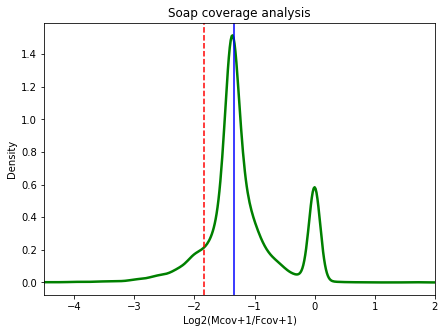

In [12]:
#Density plot considering scaffolds > 1000bp
plt.figure(figsize=(7,5))
mergecov2.ratio.plot.density(color='green', linewidth=2.5)
plt.title('Soap coverage analysis')
plt.xlim([-4.5, 2])
plt.axvline(mergecov2.ratio.median(),color='blue')
plt.axvline(mergecov2.ratio.median() - 0.5,color='red', linestyle='dashed')
plt.xlabel('Log2(Mcov+1/Fcov+1)')
plt.show()

## Coverage analysis of individuals used in our paper
- From reads form paper: mcov54,mcov55,mcov54, fcov
- From new reads: mcov63,mcov64

In [13]:
lp1 = cov2.merge(cov1, on = 'Scaffold')
lp1['Mcov63'] = lp1['Mcov63'].fillna(0)
lp1['Mcov64'] = lp1['Mcov64'].fillna(0)
lp2 = lp1[['Scaffold','Length_x','Fcov','Mcov63','Mcov64','Mcov54','Mcov55','Mcov59']]     
lp2['Mcov_total'] = lp2['Mcov63']+lp2['Mcov64']+lp2['Mcov54']+lp2['Mcov55']+lp2['Mcov59']
lp2['log_ratio'] = np.log2(lp2['Mcov_total']/lp2['Fcov'])
combData =lp2.loc[(lp2['Length_x'] >= 1000)] 
## Criteria for assign X/A
combData['chromosome_bla'] = np.where((combData['log_ratio'] <(combData.log_ratio.median()-0.5)),'X','A')
combData.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/paper/coverageBlatella.txt', index=False)

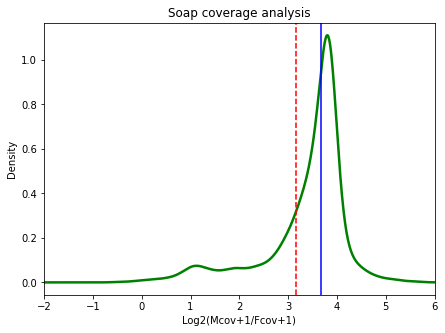

In [14]:
#Density plot considering scaffolds > 1000bp
plt.figure(figsize=(7,5))
combData.log_ratio.plot.density(color='green', linewidth=2.5)
plt.title('Soap coverage analysis')
plt.xlim([-2, 6])
plt.axvline(combData.log_ratio.median(),color='blue')
plt.axvline(combData.log_ratio.median() - 0.5,color='red', linestyle='dashed')
plt.xlabel('Log2(Mcov+1/Fcov+1)')
plt.show()